## Random Forest classifier example

In [1]:
from sklearn.ensemble import RandomForestClassifier

#Watch the video of the type of activity that was recorded 

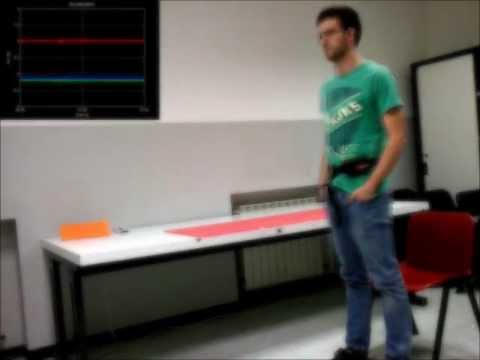

In [2]:
from IPython.display import YouTubeVideo, HTML
YouTubeVideo("XOEN9W05_4A")

In [3]:
#The Donald Bren School of Information and Computer Sciences - University of California, Irvine

info_file = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.names'
data_zip = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip'

In [4]:
!curl $info_file

###The data is extracted from the .zip file on the UCI website

In [6]:
import requests, zipfile, io
import pandas as pd
r = requests.get(data_zip)
z = zipfile.ZipFile(io.BytesIO(r.content))

In [7]:
X_train_df = pd.read_csv(z.open('UCI HAR Dataset/train/X_train.txt'), skipinitialspace=True, sep=' ', header=None)
X_train = X_train_df.values
y_train_df = pd.read_csv(z.open('UCI HAR Dataset/train/y_train.txt'), header=None)
y_train = y_train_df[0].values

###The dataset contains readings from mobile phone accelerometer and gyroscope as subjects perform a range of actions. The raw data is then manipulated to form 560 features from the initial 6 features (accelerometer 3-axis and gyroscope 3-axis).



In [8]:
X_train.shape

(7352, 561)

In [9]:
y_train.shape

(7352,)

###A training set of 7352 readings (X_train) labeled as one of six activities (y_train) is used to train a random forest classifier.

In [10]:
clf = RandomForestClassifier(n_jobs=2,n_estimators=150)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=2,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### A quick sanity check where the training data is classified by the model - should be 100% accurate or very close

In [11]:
from sklearn.metrics import accuracy_score, roc_auc_score

y_predict = clf.predict(X_train)

In [12]:
accuracy = accuracy_score(y_train, y_predict)
print('---'*20)
print('\n')
print("A Random Forest Classifier with 150 estimators was {}% accurate on the test data.".format(round(accuracy*100,2)))
print('\n')
print('---'*20)

------------------------------------------------------------


A Random Forest Classifier with 150 estimators was 100.0% accurate on the test data.


------------------------------------------------------------


###A second unseen dataset of 2947 datapoints is used to test the classifier.

In [13]:
X_test_df = pd.read_csv(z.open('UCI HAR Dataset/test/X_test.txt'), skipinitialspace=True, sep=' ', header=None)
X_test = X_test_df.values
y_test_df = pd.read_csv(z.open('UCI HAR Dataset/test/y_test.txt'), header=None)
y_test = y_test_df[0].values

In [14]:
X_test.shape

(2947, 561)

In [15]:
y_test.shape

(2947,)

###Predictions for the unseen dataset are created.

In [16]:
y_predict_test = clf.predict(X_test)

###The correct labels are loaded and prediction accuracy is tested

In [17]:
test_score = accuracy_score(y_test, y_predict_test)
print('---'*20)
print('\n')
print('A random Forest Classifier with 150 estimators, trained on the training data, was {}% accurate at labelling the unseen test data.'.format(round(test_score*100,2)))
print('\n')
print('---'*20)


------------------------------------------------------------


A random Forest Classifier with 150 estimators, trained on the training data, was 92.53% accurate at labelling the unseen test data.


------------------------------------------------------------


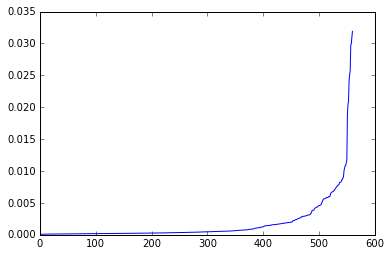

In [20]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

order = clf.feature_importances_
order.sort()
plt.plot(order)  

In [21]:
importance = pd.DataFrame(clf.feature_importances_)

In [22]:
feature = pd.read_csv(z.open('UCI HAR Dataset/features.txt'),sep=' ',header=None)

In [23]:
feature['importance'] = clf.feature_importances_

In [24]:
feature.columns = [0, 'transform', 'importance']

###The features with an importance >.015 are - 

In [25]:
for feat in feature.transform[feature.importance>.015].values:
    print(feat,feature.importance[feature.transform==feat].values)

tGravityAcc-mean()-X [ 0.0297341]
tGravityAcc-mean()-Y [ 0.02099245]
tGravityAcc-max()-X [ 0.0251645]
tGravityAcc-max()-Y [ 0.02414523]
tGravityAcc-min()-X [ 0.03086592]
tGravityAcc-min()-Y [ 0.02568863]
tGravityAcc-energy()-X [ 0.02996626]
tGravityAcc-energy()-Y [ 0.01880238]
angle(X,gravityMean) [ 0.02039927]
angle(Y,gravityMean) [ 0.03191564]


In [26]:
activity_labels = pd.read_csv(z.open('UCI HAR Dataset/activity_labels.txt'),index_col=0,sep=' ',header = None)

In [27]:
labels_activity = [x.lower() for x in activity_labels[1].tolist()]
labels_activity

['walking',
 'walking_upstairs',
 'walking_downstairs',
 'sitting',
 'standing',
 'laying']

In [28]:
from sklearn import metrics
# testing score
score_test = metrics.f1_score(y_test, y_predict_test, pos_label=list(set(y_test)),average = None)
# training score
score_train = metrics.f1_score(y_train, y_predict, pos_label=list(set(y_train)),average = None)

print('\n','metrics.f1_score for each category in training set','\n','----'*10)
for act,dec in zip(labels_activity,score_train):
    print('{} - {}%'.format(act,round(dec*100,2)))

print('\n','metrics.f1_score for each category in test set','\n','----'*10)
for act,dec in zip(labels_activity,score_test):
    print('{} - {}%'.format(act,round(dec*100,2)))


 metrics.f1_score for each category in training set 
 ----------------------------------------
walking - 100.0%
walking_upstairs - 100.0%
walking_downstairs - 100.0%
sitting - 100.0%
standing - 100.0%
laying - 100.0%

 metrics.f1_score for each category in test set 
 ----------------------------------------
walking - 93.32%
walking_upstairs - 90.38%
walking_downstairs - 90.19%
sitting - 89.58%
standing - 90.62%
laying - 100.0%


### The original paper used a SVC from R to classify the data. Here is a comparison in Python using the same type of classifier.

In [29]:
from sklearn import svm, datasets
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (14.0, 10.0)

# Run classifier
classifier = svm.SVC(kernel='linear')
y_predictSVC = classifier.fit(X_train, y_train).predict(X_test)

y_values = [0,1,2,3,4,5]
activity = labels_activity

# Compute confusion matrix
conf_arr = confusion_matrix(y_test, y_predictSVC)


norm_conf = []
for i in conf_arr:
    a = 0
    tmp_arr = []
    a = sum(i, 0)
    for j in i:
        tmp_arr.append(float(j)/float(a))
    norm_conf.append(tmp_arr)


width = len(conf_arr)
height = len(conf_arr[0])

for x in range(width):
    for y in range(height):
        ax.annotate(str(conf_arr[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')



# Show confusion matrix in a separate window
cb = fig.colorbar(res)
plt.matshow(conf_arr,cmap=plt.cm.winter)
plt.title('Confusion matrix for SVM',y=1.5)
plt.colorbar(cmap=plt.cm.YlGn)
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.yticks(y_values, activity)
plt.xticks(y_values, activity,rotation = 90,)
plt.grid(b = False, which='major', axis='both')

width = len(conf_arr)
height = len(conf_arr[0])

for x in range(width):
    for y in range(height):
        plt.annotate(str(conf_arr[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')
#plt.show()

NameError: name 'ax' is not defined

### The confusion matrix from the SVC in sklearn (Python) was very close to the result obtained by the original authors using R. (see paper https://www.elen.ucl.ac.be/Proceedings/esann/esannpdf/es2013-84.pdf)

In [30]:
accuracy = accuracy_score(y_test, y_predictSVC)
print('---'*20)
print('\n')
print("A SVC was {}% accurate on the test data.".format(round(accuracy*100,2)))
print('\n')
print('---'*20)

------------------------------------------------------------


A SVC was 96.4% accurate on the test data.


------------------------------------------------------------


### An alternative model using a Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (14.0, 10.0)

# Run classifier
#classifier = svm.SVC(kernel='linear')
#y_predictSVC = classifier.fit(X_train, y_train).predict(X_test)

y_values = [0,1,2,3,4,5]
activity = labels_activity

# Compute confusion matrix
conf_arr = confusion_matrix(y_test, y_predict_test)


norm_conf = []
for i in conf_arr:
    a = 0
    tmp_arr = []
    a = sum(i, 0)
    for j in i:
        tmp_arr.append(float(j)/float(a))
    norm_conf.append(tmp_arr)


width = len(conf_arr)
height = len(conf_arr[0])

#for x in range(width):
    #for y in range(height):
        #ax.annotate(str(conf_arr[x][y]), xy=(y, x), 
                    #horizontalalignment='center',
                    #verticalalignment='center')



# Show confusion matrix in a separate window
cb = plt.colorbar(res)
plt.matshow(conf_arr,cmap=plt.cm.winter)
plt.title('Confusion matrix for Random Forest Classifier',y=1.5)
plt.colorbar(cmap=plt.cm.YlGn)
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.yticks(y_values, activity)
plt.xticks(y_values, activity,rotation = 90,)
plt.grid(b = False, which='major', axis='both')

width = len(conf_arr)
height = len(conf_arr[0])

for x in range(width):
    for y in range(height):
        plt.annotate(str(conf_arr[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')
#plt.show()

NameError: name 'res' is not defined

In [241]:
accuracy = accuracy_score(y_test, y_predict_test)
print('---'*20)
print('\n')
print("A Random Forest Classifier with 150 estimators was {}% accurate on the test data.".format(round(accuracy*100,2)))
print('\n')
print('---'*20)

------------------------------------------------------------


A Random Forest Classifier with 150 estimators was 93.01% accurate on the test data.


------------------------------------------------------------
